In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
# set data path
def set_data_path():
    return "../data/"
#     raise NotImplementedError

In [3]:
def pre_process(torchset,n_samples,num_classes=10):
    indices = list(np.random.choice(len(torchset),n_samples))

    trainset = []
    for ix in indices:
        x,y = torchset[ix]
        ohe_y = torch.zeros(num_classes)
        ohe_y[y] = 1
        trainset.append(((x/np.linalg.norm(x)).reshape(-1),ohe_y))
    return trainset

In [4]:
# load svhn data
transform = transforms.Compose([
    transforms.ToTensor()
])

data_path = set_data_path() ## set this data path

trainset0 = torchvision.datasets.SVHN(root=data_path,
                                    split = "train",
                                    transform=transform,
                                    download=True)
testset0 = torchvision.datasets.SVHN(root=data_path,
                                    split = "test",
                                    transform=transform,
                                    download=True)

trainset = pre_process(trainset0,n_samples=5000, num_classes=10)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=2)


testset = pre_process(testset0,n_samples=5000, num_classes=10)
test_loader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False, num_workers=2)



Using downloaded and verified file: ../data/train_32x32.mat
Using downloaded and verified file: ../data/test_32x32.mat


In [5]:
# rfm import 
from rfm import *

`eigenpro2` not installed.. using torch.linalg.solve for training kernel model


In [6]:
# run rfm
rfm = LaplaceRFM(bandwidth=1.)
M, _ = rfm.fit(train_loader, test_loader, iters=1, loader=True, classif=True)

Loaders provided
Dataset shape: x_train - torch.Size([5000, 3072]), y_train - torch.Size([5000, 10]), x_test - torch.Size([5000, 3072]), y_test - torch.Size([5000, 10])
Round 0, Train Acc: 100.00%


KeyboardInterrupt: 

We have run three steps of RFM (the first iterate is the original laplace kernel), returning the M matrix of the final iterate.

In [16]:
# visualize M matrix
import matplotlib.pyplot as plt
%matplotlib inline

`eigenpro2` not installed.. using torch.linalg.solve for training kernel model


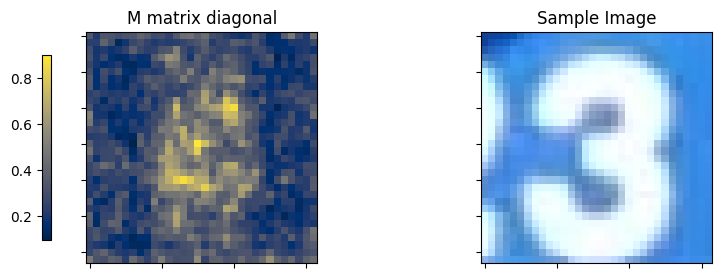

In [17]:
f, axarr = plt.subplots(1,2,figsize=(10, 3))
axarr[0].axes.xaxis.set_ticklabels([])
axarr[0].axes.yaxis.set_ticklabels([])
axarr[1].axes.xaxis.set_ticklabels([])
axarr[1].axes.yaxis.set_ticklabels([])

pcm = axarr[0].imshow(np.mean(np.diag(M).reshape(3,32,32),axis=0),cmap='cividis')
axarr[0].set_title("M matrix diagonal")
f.colorbar(mappable=pcm, ax=axarr[0], shrink=0.8,location="left")
axarr[1].imshow(torch.moveaxis(trainset0[3][0],0,2))
axarr[1].set_title("Sample Image")
print()

Here we plot the diagonal (averaged across channels) of the M matrix to see which coordinates are being highlighted by RFM. The center of the image is highlighted (where the digits appear). 